In [8]:
# Качаем данные о всех регионах России
import pyrosm
from pyrosm.data import sources

directory = "D:/Topology Service/Urban-Topology-Analysis-Service/experiments/data/"
cityName = "Московская область"

for region in sources.europe.russia.available:
    pyrosm.get_data(region, update=False, directory=directory)

Downloaded Protobuf data 'central-fed-district-latest.osm.pbf' (687.9 MB) to:
'D:\Topology Service\Urban-Topology-Analysis-Service\experiments\data\central-fed-district-latest.osm.pbf'
Downloaded Protobuf data 'crimean-fed-district-latest.osm.pbf' (36.14 MB) to:
'D:\Topology Service\Urban-Topology-Analysis-Service\experiments\data\crimean-fed-district-latest.osm.pbf'
Downloaded Protobuf data 'far-eastern-fed-district-latest.osm.pbf' (289.55 MB) to:
'D:\Topology Service\Urban-Topology-Analysis-Service\experiments\data\far-eastern-fed-district-latest.osm.pbf'
Downloaded Protobuf data 'kaliningrad-latest.osm.pbf' (16.55 MB) to:
'D:\Topology Service\Urban-Topology-Analysis-Service\experiments\data\kaliningrad-latest.osm.pbf'
Downloaded Protobuf data 'north-caucasus-fed-district-latest.osm.pbf' (109.54 MB) to:
'D:\Topology Service\Urban-Topology-Analysis-Service\experiments\data\north-caucasus-fed-district-latest.osm.pbf'
Downloaded Protobuf data 'northwestern-fed-district-latest.osm.pbf' (

In [1]:
# Административные границы РФ (их типы)
import pyrosm
import geopandas
import numpy as np

for i in range(3, 11):
    print(f'LEVEL: {i}')
    try:
        filePath = f'D:/Topology Service/Urban-Topology-Analysis-Service/experiments/boarders/admin_level_{i}.geojson' 
        dataframe = geopandas.read_file(filePath, driver='GeoJSON')

        dataframe = dataframe.astype({'official_status': 'str'})
        status = np.unique(dataframe['official_status'])
        print(f'STATUS: {status}')
    except Exception:
        print('None')


LEVEL: 3
STATUS: ['None' 'ru:федеральный округ']
LEVEL: 4
STATUS: ['None' 'ru:автономная область' 'ru:автономный округ'
 'ru:город федерального значения' 'ru:край' 'ru:область' 'ru:республика'
 'uk:містo зі спеціальним статусом']
LEVEL: 5
None
LEVEL: 6
STATUS: ['None' 'ru:ЗАТО' 'ru:городской округ' 'ru:муниципальный район']
LEVEL: 7
None
LEVEL: 8
STATUS: ['None' 'ru:ЗАТО'
 'ru:внутригородская территория города федерального значения' 'ru:город'
 'ru:городское поселение' 'ru:городской округ'
 'ru:городской округ (поселение)' 'ru:межселенная территория'
 'ru:муниципальный район' 'ru:поселение' 'ru:посёлок'
 'ru:посёлок при станции' 'ru:сельское поселение' 'ru:станция']
LEVEL: 9
STATUS: ['None' 'ru:район' 'ru:село' 'административно-территориальное образование']
LEVEL: 10
STATUS: ['None' 'ru:аул' 'ru:город' 'ru:деревня' 'ru:населённый пункт'
 'ru:посёлок' 'ru:посёлок городского типа' 'ru:рабочий посёлок'
 'ru:разъезд' 'ru:село' 'ru:слобода' 'ru:станица' 'ru:станция' 'ru:хутор']


<AxesSubplot: >

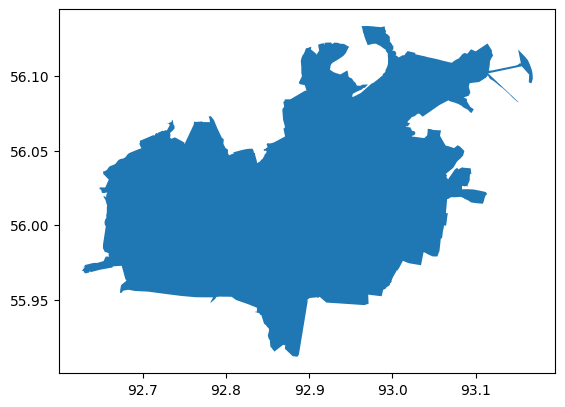

In [21]:
import pyrosm
import geopandas
import numpy as np

level = 6
filePath = f'D:/Topology Service/Urban-Topology-Analysis-Service/experiments/boarders/admin_level_{level}.geojson' 
dataframe = geopandas.read_file(filePath, driver='GeoJSON')

dataframe = dataframe.astype({'official_status': 'str'})
dataframe = dataframe[dataframe['name'] == 'городской округ Красноярск']
# print(np.unique(dataframe['name']))
dataframe.plot()

# osm = pyrosm.OSM(filePath, bounding_box=)


# dataframe = osm.get_boundaries()
# dataframe.plot(column=dataframe['name'], cmap='viridis') 


# levels = np.unique(dataframe['admin_level'])
# print(f'LEVELS: {levels}')

# result = dataframe[dataframe['admin_level'] == 4]
# dataframe.plot()
 
# result_str = ''
# for name in result['name']:
#     result_str += " "+name+"; "

# print(result_str)

# nodes, edges = osm.get_network(network_type="driving", nodes=True)
# drive_net = osm.get_network(network_type="driving")
# drive_net.plot(figsize=(12,12))

In [6]:
import pyrosm

directory = 'D:/Topology Service/Urban-Topology-Analysis-Service/experiments/data/siberian-fed-district-latest.osm.pbf'

bbox_geom = dataframe['geometry'].values[0]
osm = pyrosm.OSM('D:/Topology Service/Urban-Topology-Analysis-Service/experiments/data/siberian-fed-district-latest.osm.pbf', bounding_box=bbox_geom)

camden = osm.get_buildings()
print('buildings')
ax = camden.plot(column="building", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))

In [ ]:
#Extract certain area

selected_boundary = osm.get_boundaries(name="Василеостровский район")
selected_boundary.plot(facecolor="none", edgecolor="blue")
bbox_geom = selected_boundary['geometry'].values[0]

osm = pyrosm.OSM(filepath=filePath, bounding_box=bbox_geom)


In [ ]:
#Extract graph and buildings

drive_net = osm.get_network(network_type="driving")
ax = drive_net.plot(figsize=(12,12), lw=0.7, alpha=0.6, color="orange")
camden = osm.get_buildings()
camden.plot(ax=ax)

In [8]:
#Список городов РФ

import pandas as pd

path = './cities.csv'

df = pd.read_csv(path)
df.head(100)
# df.to_csv('./cities.csv')

,Unnamed: 0,Город,Федеральный округ,Население,Широта,Долгота,Часовой пояс
0,0,Москва,Центральный,11514330.0,55.753879,37.620373,UTC+3
1,1,Санкт-Петербург,Северо-Западный,4848742.0,59.939125,30.315822,UTC+3
2,2,Новосибирск,Сибирский,1498921.0,55.028102,82.921058,UTC+7
3,3,Екатеринбург,Уральский,1377738.0,56.838633,60.605489,UTC+5
4,4,Нижний Новгород,Приволжский,1250615.0,56.324209,44.005395,UTC+3
...,...,...,...,...,...,...,...
95,95,Балаково,Приволжский,199576.0,52.022269,47.782815,UTC+4
96,96,Северодвинск,Северо-Западный,192265.0,64.562530,39.818272,UTC+3
97,97,Армавир,Южный,188897.0,45.001034,41.132392,UTC+3
98,98,Подольск,Центральный,187956.0,55.438959,37.570270,UTC+3


In [20]:
import osmnx as ox
def exists(city):
    query = {'city': city}
    try:
        gdf = ox.geocode_to_gdf(query)
        return True
    except ValueError:
        return False

i = 0
for city in df['Город']:
    print(i)
    i+=1
    if not exists(city):
        print(city)

26134.0


In [12]:
import osmnx as ox
import pandas
import geopandas
import numpy as np


dataframe = geopandas.read_file('./regions.json', driver='GeoJSON')
cities = pandas.read_csv('./cities.csv')

# def uniq(lst):
#     last = object()
#     for item in lst:
#         if item == last:
#             continue
#         yield item
#         last = item

# def sort_and_deduplicate(l):
#     return list(uniq(sorted(l, reverse=True)))

def children(ids_list, buffer):
    plot(ids_list=ids_list)
    buffer.extend(ids_list)
    children = dataframe[dataframe['parents'].str.contains('|'.join(str(x) for x in ids_list), na=False)]
    return children['osm_id'].to_list()

def plot(ids_list):
    if len(ids_list) != 0:
        children = dataframe[dataframe['osm_id'].isin(ids_list)]
        test = children.iloc[0]['geometry']
        # print(test)
        print(test.boundary)
        # print(test.coords)
        # children.plot(cmap='viridis')



# # for city in cities[cities['Население'] > 1000000]['Город']:
# #     df = dataframe[dataframe['local_name']==city]
# #     ids_list = df['osm_id'].to_list()

# #     while len(ids_list) != 0:
# #         plot(ids_list=ids_list, city=city)
# #         ids_list = children(ids_list=ids_list, buffer=buffer)

buffer = []
# no_found = set()

for city in cities[cities['Население'] < 100000]['Город']:
    df = dataframe[dataframe['local_name']==city]
    ids_list = df['osm_id'].to_list()
   
    while len(ids_list) != 0:
        ids_list = children(ids_list=ids_list, buffer=buffer)

# buffer = sort_and_deduplicate(buffer)

# print(buffer)
# print(no_found)

# df = dataframe[dataframe['osm_id'].isin(buffer)]
# df.to_file('./regions_new.json', driver="GeoJSON")  
# ct = cities[~cities['Город'].isin(no_found)]
# ct.to_csv('./cities_new.csv')

LINESTRING (68.1457442 58.1846835, 68.1476981 58.182489, 68.1531501 58.181972, 68.1565041 58.1792359, 68.17801 58.174667, 68.1815068 58.1806, 68.1875812 58.1857104, 68.2005585 58.1887807, 68.2100043 58.1889083, 68.2164365 58.1863553, 68.2124747 58.1821669, 68.2099128 58.1755999, 68.2118899 58.1655334, 68.2173001 58.1552457, 68.223083 58.1526578, 68.2396713 58.1491682, 68.2570773 58.147605, 68.266485 58.1485424, 68.2777714 58.1542169, 68.2813075 58.1577438, 68.2844077 58.1625224, 68.2858124 58.1672748, 68.2893485 58.1742491, 68.291819 58.1757306, 68.2963723 58.1760882, 68.3007319 58.1754241, 68.3052368 58.1734061, 68.3194002 58.1642073, 68.3292629 58.1586126, 68.3390292 58.1539126, 68.3282139 58.1457974, 68.3316364 58.1429438, 68.3416718 58.1396424, 68.3378851 58.1317183, 68.3262617 58.1168699, 68.3185756 58.1147785, 68.3143246 58.1133295, 68.3140665 58.1122044, 68.3144422 58.1111958, 68.3147556 58.1102999, 68.3145789 58.1096528, 68.315134 58.1081972, 68.3168986 58.1071454, 68.3183554 5

In [12]:
# exctract all highways

import osmium as o

filePath = 'D:/Topology Service/Urban-Topology-Analysis-Service/experiments/data/test.osm' 

nodes_ids = set()
ways_ids = set()

class PreConvert(o.SimpleHandler):
    def way(self, w):
        if 'highway' in w.tags:
            ways_ids.add(w.id)
            for node in w.nodes:
                nodes_ids.add(node.ref)

class PostConvert(o.SimpleHandler):
    def __init__(self, writer):
        super(PostConvert, self).__init__()
        self.writer = writer

    def node(self, n):
        if n.id in nodes_ids:
            self.writer.add_node(n)

    def way(self, w):
        if w.id in ways_ids:
            self.writer.add_way(w)



handler = PreConvert()
handler.apply_file(filePath)

In [13]:
writer = o.SimpleWriter('./highways.osm')
handler = PostConvert(writer)
handler.apply_file(filePath)
writer.close()

In [14]:
import osmnx as ox
import numpy as np

filePath = 'D:/Topology Service/Urban-Topology-Analysis-Service/experiments/highways.osm' 
G = ox.graph_from_xml(filePath)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable deg2rad method

In [2]:
import osmnx as ox
import pandas 
import geopandas

# def check(city, df):
#     query = {'city': city}
#     try:
#         gdf = ox.geocode_to_gdf(query)
#         df = pd.concat([df, gdf[['geometry', 'bbox_north', 'bbox_south', 'bbox_east',  'bbox_west']]])
#         return df
#     except ValueError:
#         return df

filePath = './cities.csv' 
dataframe = pandas.read_csv(filePath)
dataframe
# dataframe = dataframe[dataframe['Население']>1000000]
# cities = []
# df = pd.DataFrame(columns=['city', 'geometry', 'bbox_north', 'bbox_south', 'bbox_east',  'bbox_west'])
# for city in dataframe['Город']:
#     cities.append(city)
#     df = check(city, df)

# df['city'] = cities

# df.head()


,Unnamed: 0,Город,Федеральный округ,Население,Широта,Долгота,Часовой пояс
0,0,Москва,Центральный,11514330.0,55.753879,37.620373,UTC+3
1,1,Санкт-Петербург,Северо-Западный,4848742.0,59.939125,30.315822,UTC+3
2,2,Новосибирск,Сибирский,1498921.0,55.028102,82.921058,UTC+7
3,3,Екатеринбург,Уральский,1377738.0,56.838633,60.605489,UTC+5
4,4,Нижний Новгород,Приволжский,1250615.0,56.324209,44.005395,UTC+3
...,...,...,...,...,...,...,...
320,320,Березовский,Уральский,51583.0,56.909628,60.818026,UTC+5
321,321,Балахна,Приволжский,51526.0,56.494993,43.575895,UTC+3
322,322,Ливны,Центральный,50430.0,52.428512,37.603944,UTC+3
323,323,Донецк,Южный,50085.0,48.335093,39.946065,UTC+3


In [37]:
import pandas


dataframe = geopandas.read_file('./regions.json', driver='GeoJSON')

dataframe = dataframe[dataframe['local_name']=='Москва']
test = dataframe.iloc[0]['geometry']
pol = str(test.boundary)
print(dataframe)


with open("Output.txt", "w") as text_file:
    text_file.write(pol)


      osm_id        boundary  admin_level          parents    name local_name  \
1793 -102269  administrative          4.0  -1029256,-60189  Moscow     Москва   

     name_en                                           all_tags  \
1793  Moscow  {'ref': 'RU-MOW', 'name': 'Москва', 'int_ref':...   

                                               geometry  
1793  MULTIPOLYGON (((36.80310 55.44083, 36.81136 55...  


In [67]:
import geopandas as gpd
from shapely.geometry.multilinestring import MultiLineString
from shapely.geometry.linestring import LineString

def to_list(polygon : LineString):
    list = []
    for x, y in polygon.coords:
        list.append([x, y])
    x, y = polygon.coords[0]
    list.append([x, y])
    return list


def to_json_array(polygon):
    coordinates_list = []
    if type(polygon) == LineString:
       coordinates_list.append(to_list(polygon))
    elif type(polygon) == MultiLineString:
        for line in polygon:
            coordinates_list.append(to_list(line))
    else:
        raise ValueError("polygon must be type of LineString or MultiLineString")

    return coordinates_list

def region_to_scheme(regions, ids_list, depth : int):
    polygons = regions[regions['osm_id'].isin(ids_list)]
    ids_list = regions[regions['parents'].str.contains('|'.join(str(x) for x in ids_list), na=False)]['osm_id'].to_list()
    for index, row in polygons.iterrows():
        print(to_json_array(row['geometry'].boundary))


    print('!'*100)
    return ids_list

def regions_to_scheme(city, regions):
    ids_list = regions[regions['local_name']==city]['osm_id'].to_list()
    depth = 0
    while len(ids_list) != 0:
        ids_list = region_to_scheme(regions=regions, ids_list=ids_list, depth=depth)
        depth += 1
        

# regions_df = gpd.read_file('./regions.json', driver='GeoJSON') 
regions_to_scheme('Севастополь', regions_df)



[[[33.0912003, 44.575292], [33.0923427, 44.5611278], [33.0948391, 44.5470488], [33.098678, 44.5331207], [33.1038415, 44.5194085], [33.1103056, 44.5059764], [33.11804, 44.4928871], [33.1270087, 44.4802021], [33.1371699, 44.4679806], [33.1484762, 44.45628], [33.1608749, 44.4451553], [33.1743082, 44.4346585], [33.1887135, 44.424839], [33.2040236, 44.4157429], [33.2086709, 44.4133451], [33.2094146, 44.4120847], [33.2183833, 44.399382], [33.2285445, 44.3871437], [33.2398508, 44.3754269], [33.2522496, 44.3642868], [33.2656829, 44.3537755], [33.2800882, 44.3439424], [33.2953982, 44.3348338], [33.3115417, 44.3264924], [33.3284434, 44.3189574], [33.3460243, 44.3122644], [33.3642027, 44.3064448], [33.3828937, 44.3015261], [33.4020101, 44.2975313], [33.4203481, 44.2946542], [33.4320666, 44.285474], [33.4464718, 44.2756294], [33.4617819, 44.2665102], [33.4779254, 44.2581591], [33.494827, 44.2506154], [33.512408, 44.2439146], [33.5305864, 44.2380882], [33.5492773, 44.2331638], [33.5651943, 44.22983